## Overview

Acoustic noise produced by airfoils has become an increasingly important area of study as it directly impacts the noise levels generated by aircraft, wind turbines, and other systems that rely on airfoil designs. Accurate prediction of airfoil self-noise is crucial for optimizing these designs and minimizing their noise footprint. This report presents an analysis of the airfoil self-noise dataset available at the UCI Machine Learning Repository and develops linear and polynomial regression models to predict the self-noise.

### Attribute Information

There are 5 input features in this dataset:
1. Frequency in Hertzs
2. Angle of Attack in degrees
3. Chord length, in meters
4. Free-stream velocity, in meters per second
5. Suction side displacement thickness in meter

There is only one output:
1. Scaled sound pressure level in decibels

In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics


warnings.filterwarnings("ignore")

## Step 1: Load the Data

In [96]:
# Import the data file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
column_names = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Sound_pressure_level']
df = pd.read_csv(url, sep='\t', names=column_names)

print(df.head())

   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_side_displacement_thickness  Sound_pressure_level  
0                             0.002663               126.201  
1                             0.002663               125.201  
2                             0.002663               125.951  
3                             0.002663               127.591  
4                             0.002663               127.461  


In [52]:
# Dimension of the dataset
df.shape

(1503, 6)

In [7]:
df.describe()

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_attack                      1503 non-null   float64
 2   Chord_length                         1503 non-null   float64
 3   Free_stream_velocity                 1503 non-null   float64
 4   Suction_side_displacement_thickness  1503 non-null   float64
 5   Sound_pressure_level                 1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


## Step 2: Exploratory data analysis

### Missing Value

Text(0.5, 1.0, 'Missing value in the dataset')

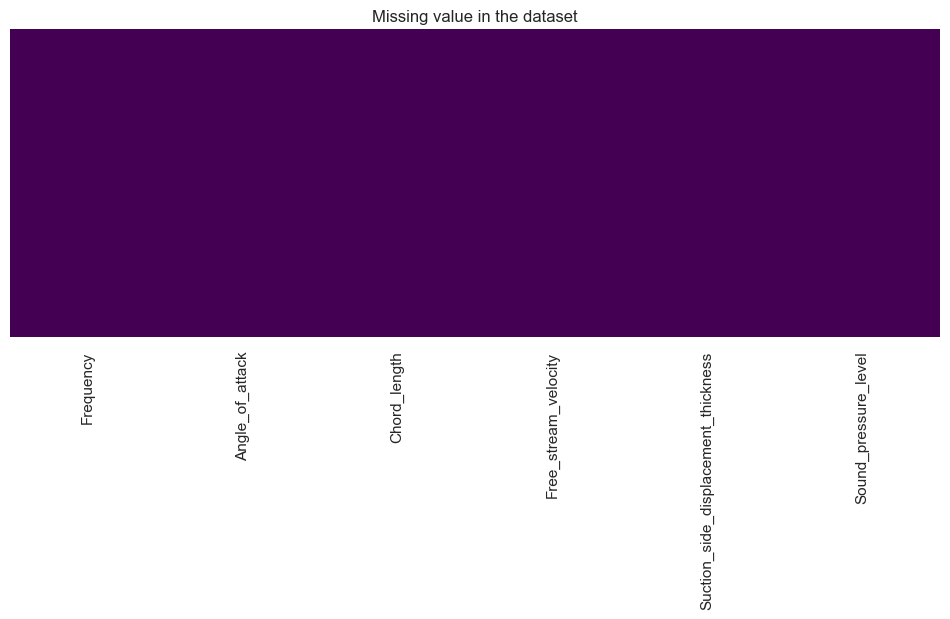

In [30]:
# Determine if there is missing value
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing value in the dataset")

There is no missing value in the dataset.

### Output Analysis

In [12]:
df['Sound_pressure_level'].describe()

count    1503.000000
mean      124.835943
std         6.898657
min       103.380000
25%       120.191000
50%       125.721000
75%       129.995500
max       140.987000
Name: Sound_pressure_level, dtype: float64

<AxesSubplot: xlabel='Sound_pressure_level', ylabel='Density'>

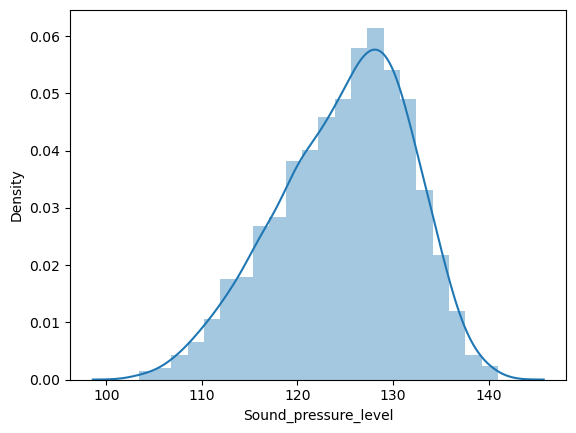

In [10]:
sns.distplot(df['Sound_pressure_level'])

In [11]:
# Skewness and kurtosis
print("Skewness: %f" % df['Sound_pressure_level'].skew())
print("Kurtosis: %f" % df['Sound_pressure_level'].kurt())

Skewness: -0.418952
Kurtosis: -0.314187


This indicates the sound pressure level data has a slightly left-skewed distribution with fewer extreme values and thinner tails compared to a normal distribution.

### Relationship with variables

Sactter plot and box plot of each feature are plotted to visualize the relationship between each variable and the output.

#### 1. Frequency vs. Sound Pressure Level

<AxesSubplot: xlabel='Frequency', ylabel='Sound_pressure_level'>

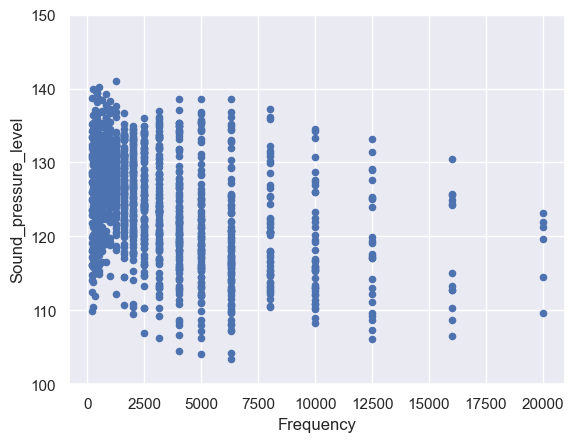

In [59]:
# Scatter plot of Frequency vs. Sound pressure level
var = 'Frequency'
data_F = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_F.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 20.5, 100.0, 150.0)

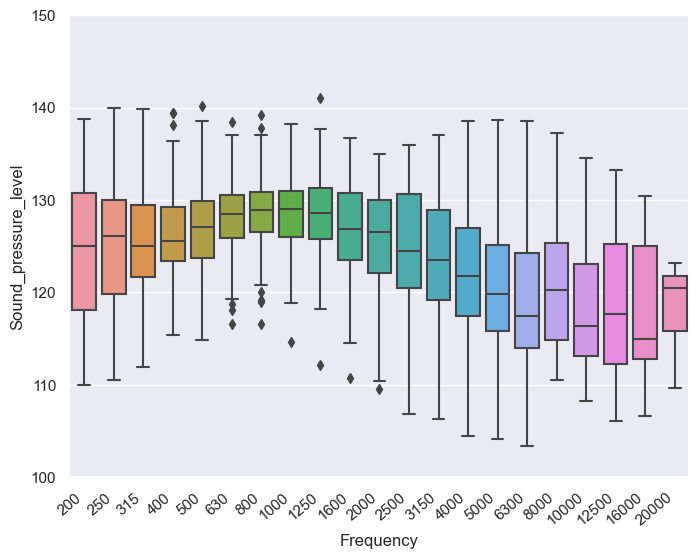

In [60]:
# Box plot of Frequency vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_F)
fig.axis(ymin=100, ymax=150)

#### 2. Angle of Attack vs. Sound Pressure Level

<AxesSubplot: xlabel='Angle_of_attack', ylabel='Sound_pressure_level'>

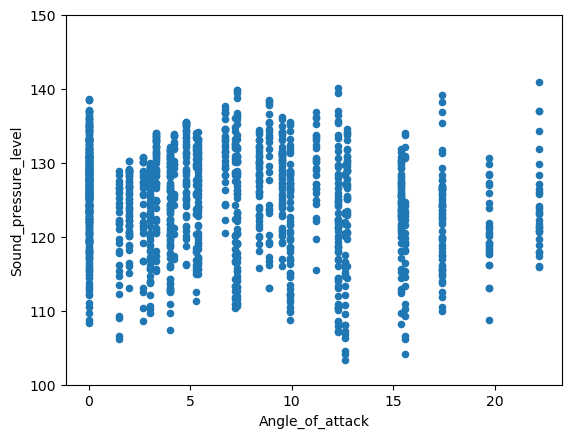

In [38]:
# Scatter plot of Angle of Attack vs. Sound pressure level
var = 'Angle_of_attack'
data_A = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_A.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 26.5, 100.0, 150.0)

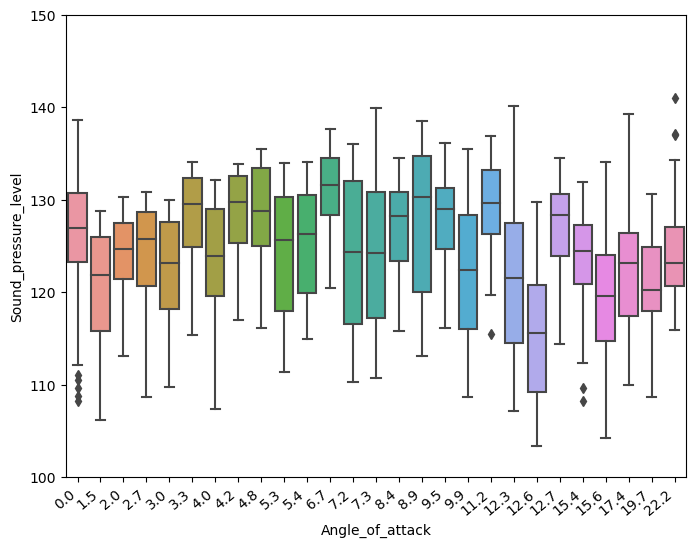

In [39]:
# Box plot of Angle of Attack vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_A)
fig.axis(ymin=100, ymax=150)

#### 3. Chord_length vs. Sound Pressure Level

<AxesSubplot: xlabel='Chord_length', ylabel='Sound_pressure_level'>

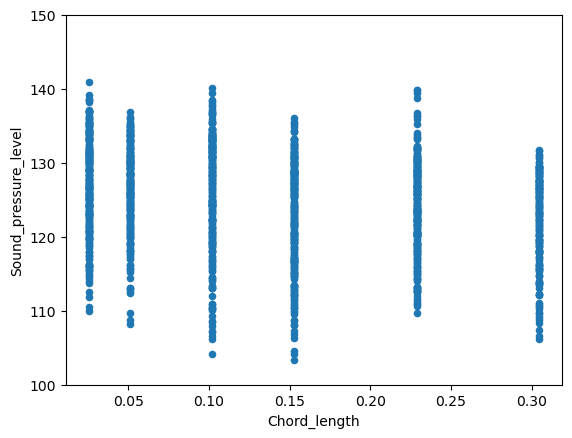

In [40]:
# Scatter plot of Chord Length vs. Sound pressure level
var = 'Chord_length'
data_C = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_C.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 5.5, 100.0, 150.0)

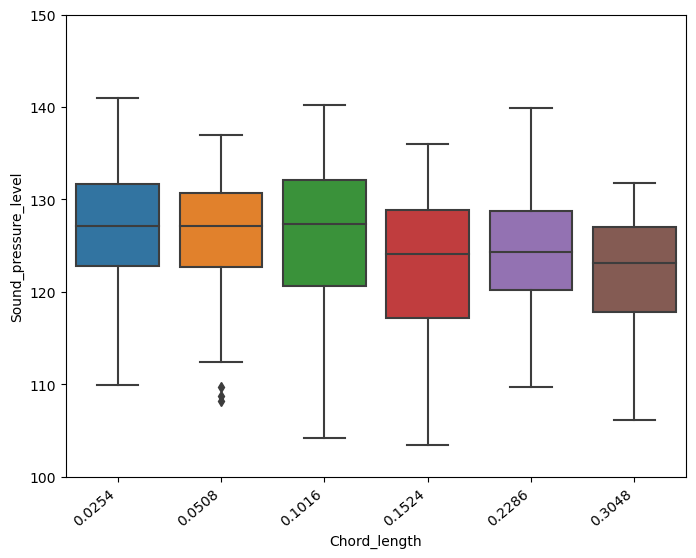

In [41]:
# Box plot of Chord Length vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_C)
fig.axis(ymin=100, ymax=150)

#### 4. Free Stream Velocity vs. Sound Pressure Level

<AxesSubplot: xlabel='Free_stream_velocity', ylabel='Sound_pressure_level'>

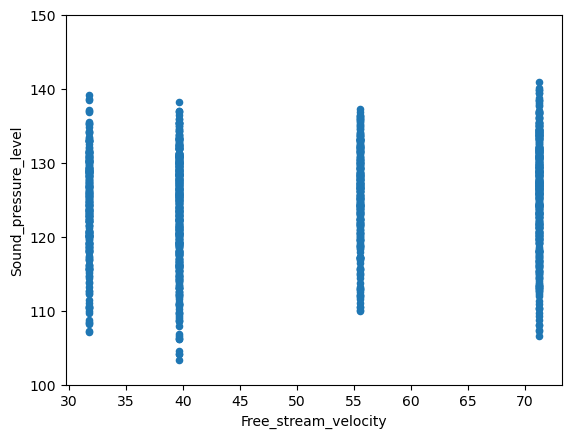

In [42]:
# Scatter plot of Free Stream Velocity vs. Sound pressure level
var = 'Free_stream_velocity'
data_V = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_V.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 3.5, 100.0, 150.0)

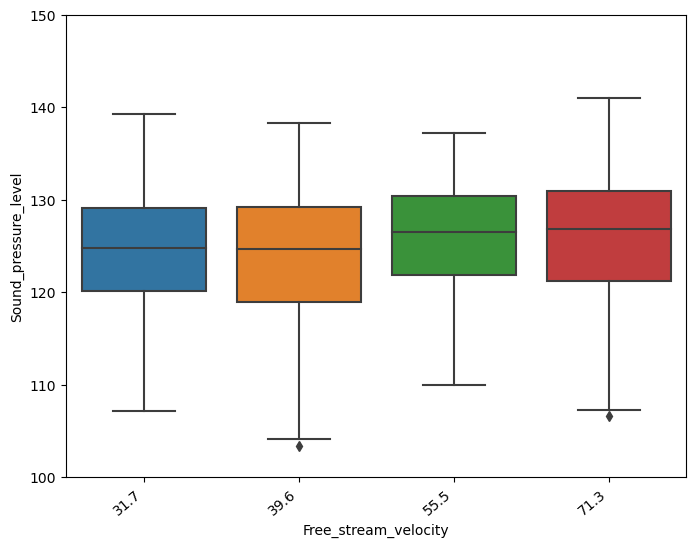

In [43]:
# Box plot of Free Stream Velocity vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_V)
fig.axis(ymin=100, ymax=150)

#### 5. Suction Side Displacement Thickness vs. Sound Pressure Level

<AxesSubplot: xlabel='Suction_side_displacement_thickness', ylabel='Sound_pressure_level'>

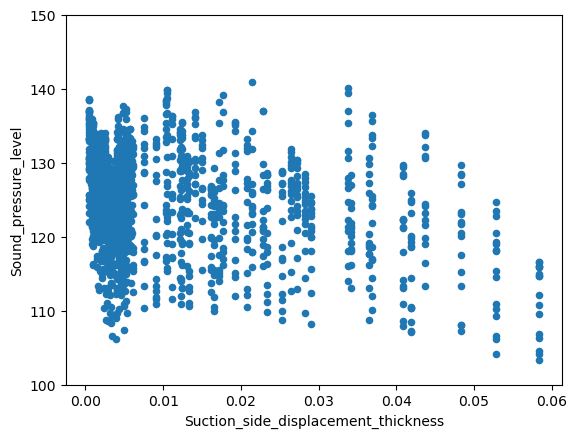

In [44]:
# Scatter plot of Suction Side Displacement Thickness vs. Sound pressure level
var = 'Suction_side_displacement_thickness'
data_S = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_S.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 104.5, 100.0, 150.0)

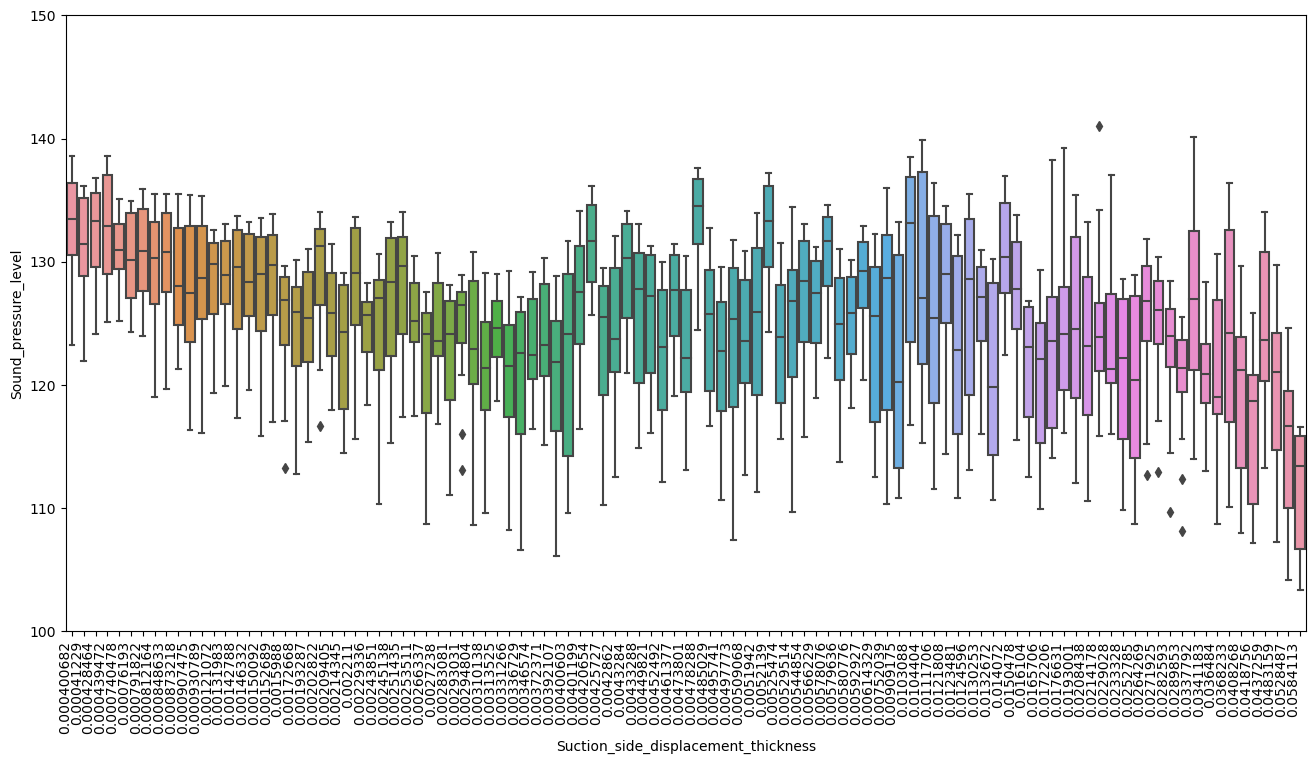

In [49]:
# Box plot of Suction Side Displacement Thickness vs. Sound pressure
fig, ax = plt.subplots(figsize=(16,8))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_S)
fig.axis(ymin=100, ymax=150)

### Scatter plots between Sound Pressure Level and variables

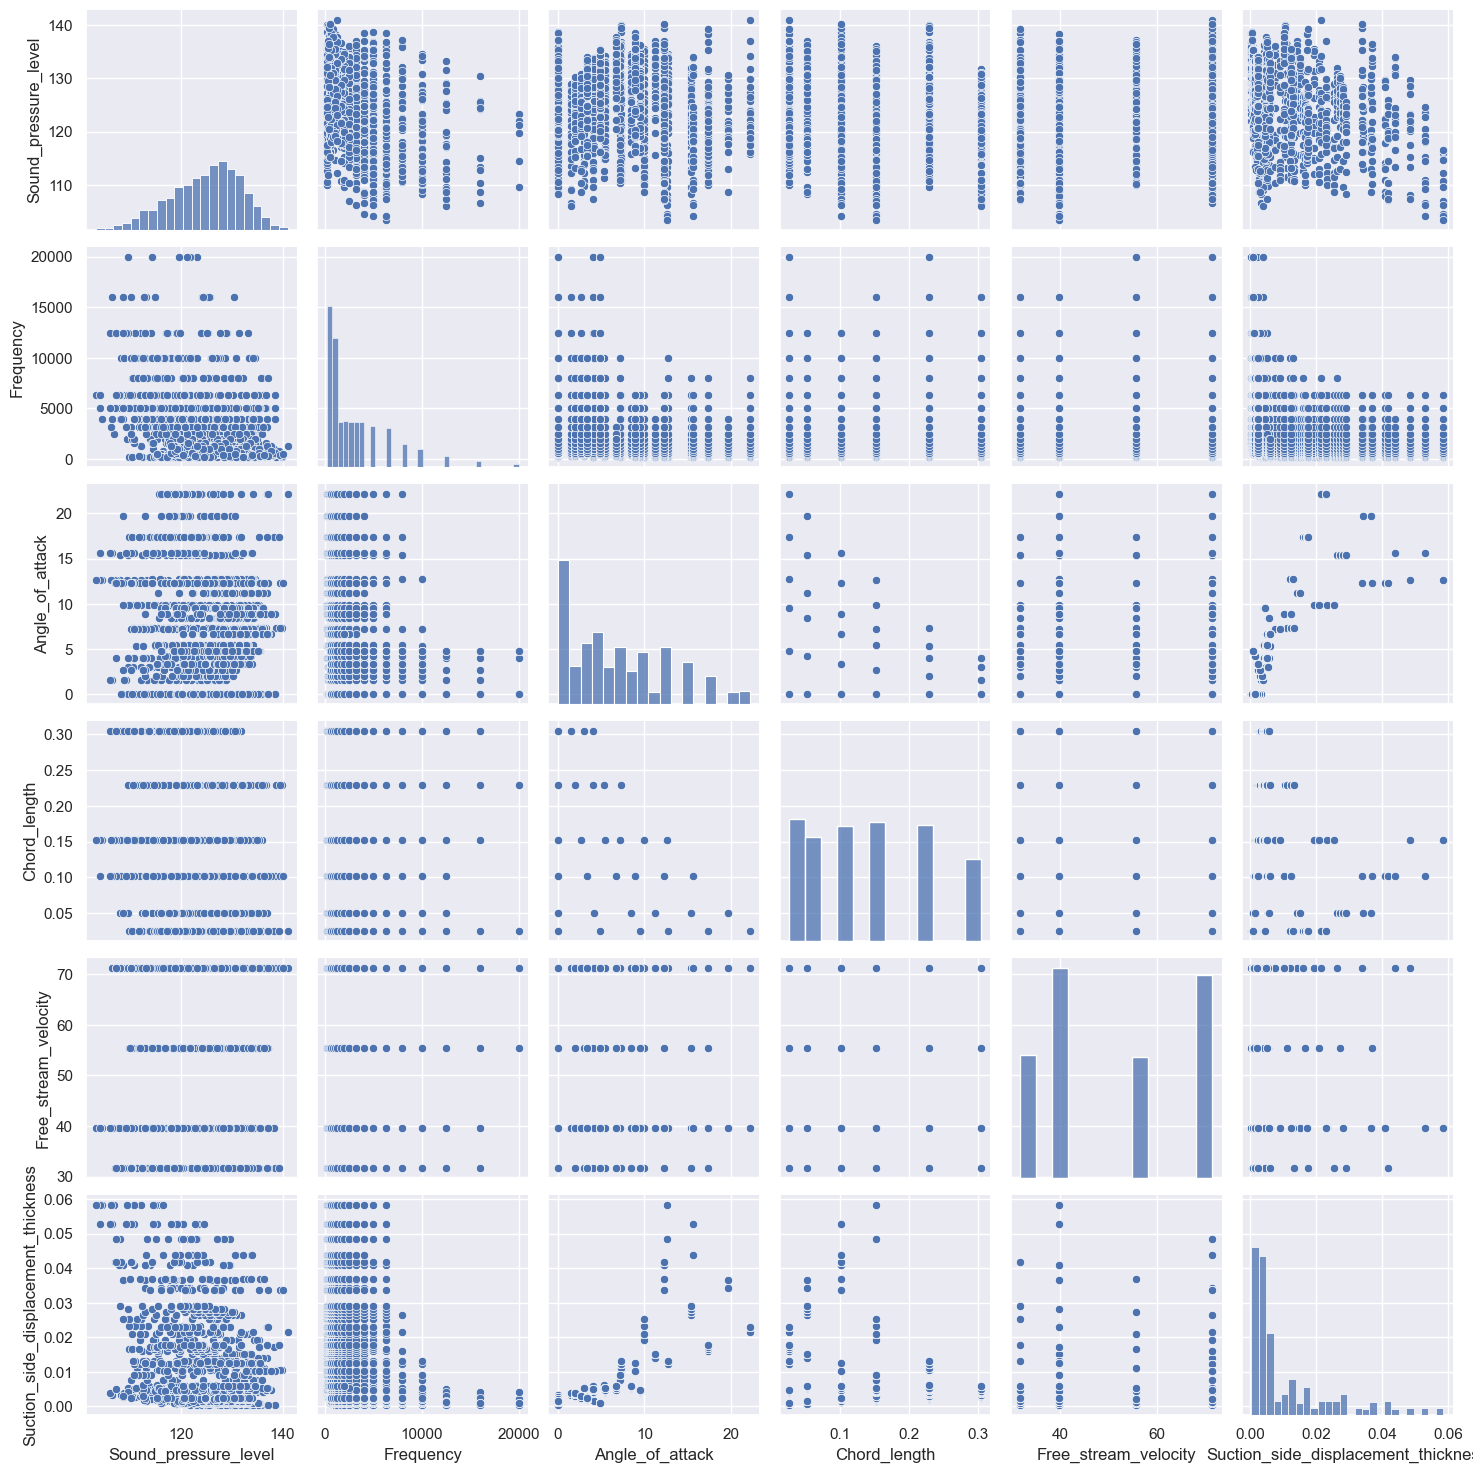

In [88]:
# Scatterplot
sns.set()
cols = ['Sound_pressure_level', 'Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### Correlation Matrix

<AxesSubplot: >

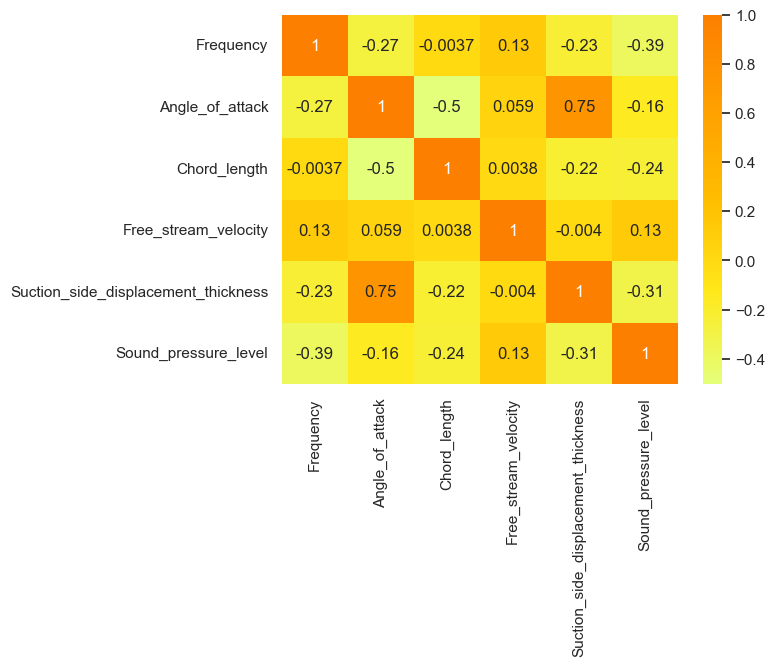

In [34]:
# Correlation plot
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

According to the correlation matrix, we observe:
1. Frequency is most strongly correlated with Sound pressure level among all variables (Cor = -0.39).
2. There is a strong correlation between Angle of Attack and Suction Side Displacement Thickness (Cor = 0.75).
3. There is a relative strong negative correlation between Chord Length and Angle of Attack (Cor = -0.5).

### Multicollinearities

In [97]:
# Calculate the VIF value
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the features as a dataframe
X_df = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_info['Column'] = X_df.columns
vif_info.sort_values('VIF', ascending=False)


,VIF,Column
3,7.148723,Free_stream_velocity
1,6.557489,Angle_of_attack
4,4.299617,Suction_side_displacement_thickness
2,3.254447,Chord_length
0,1.942627,Frequency


We can observe that the VIF values of Free_stream_velocity, Angle_of_attack and Suction_side_displacement_thickness are relatively high (above 4). In order to create a more accurate model, we need to clean those multicollinearities from the data.

Based on the correlation matrix, the Angle of attack and Suction side displacement is highly correlated with each other. For these two features, we can replace them with a principle component.

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(np.array(df[['Angle_of_attack', 'Suction_side_displacement_thickness']]))
print("Variance explained: ", pca.explained_variance_)

y = pca.transform(np.array(df[['Angle_of_attack', 'Suction_side_displacement_thickness']]))
new_variable = pd.DataFrame(y)

X_df['New_variable'] = new_variable


Variance explained:  [35.02433866]


In [99]:
# Drop columns
X_df = X_df.drop(['Angle_of_attack', 'Suction_side_displacement_thickness'], axis=1)
X_df.head()

,Frequency,Chord_length,Free_stream_velocity,New_variable
0,800,0.3048,71.3,-6.782307
1,1000,0.3048,71.3,-6.782307
2,1250,0.3048,71.3,-6.782307
3,1600,0.3048,71.3,-6.782307
4,2000,0.3048,71.3,-6.782307


In [100]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_info['Column'] = X_df.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,4.464768,Free_stream_velocity
1,3.521775,Chord_length
0,2.025104,Frequency
3,1.443104,New_variable


Now we have all variables with VIF values are less than 5. With these variables, we can build our regression model and obtain interpretable results.

## Step 3: Preprocess Dataset

In [101]:
# Define the X and y
X = X_df.values
# X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

# Normalize the features
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=102)

## Step 4: Build the Model

### Multi-Linear Regression Model

R squared:  0.5427664889174263
intercept: 0.001494634696208249
slope: [-0.58710775 -0.52485794  0.24310218 -0.59069077]


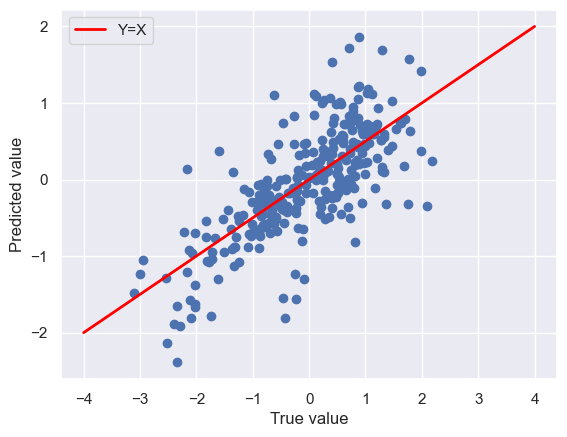

Linear Regression Model Mean Absolute Error: 0.57


In [102]:
# Fit the LR model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy
accuracy = lr.score(X_test, y_test)
print("R squared: ", accuracy)

# Cross validation score
lr_scores = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Linear Regression Model Mean Absolute Error: {np.mean(lr_scores):.2f}")

# Print the Intercept:
print('intercept:', lr.intercept_)

# Print the Slope:
print('slope:', lr.coef_)

# Plot the predicted result vs true result
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(-4, 4, 100), np.linspace(-2, 2, 100), label='Y=X', color='red', lw=2)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

### Polynomial Regression Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R squared for Degree 1: 0.5427664889174264
Mean Suqared Error for Degree 1: 0.7077062597170881

R squared for Degree 2: 0.6270505234096904
Mean Suqared Error for Degree 2: 0.639159151598312

R squared for Degree 3: 0.7191984118664706
Mean Suqared Error for Degree 3: 0.5546050125946641

R squared for Degree 4: 0.7228292609363742
Mean Suqared Error for Degree 4: 0.5510077414216498

R squared for Degree 5: 0.7193789977739218
Mean Suqared Error for Degree 5: 0.5544266482952103

R squared for Degree 6: 0.5716098511430691
Mean Suqared Error for Degree 6: 0.685020783701044

R squared for Degree 7: -21.225869073290415
Mean Suqared Error for Degree 7: 4.934161797594317



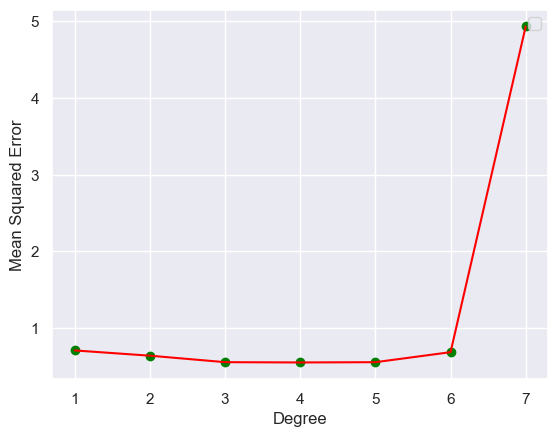

In [117]:
degrees = [1, 2, 3, 4, 5, 6, 7]
plt_mean_squared_error = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    poly.fit(X_poly_train, y_train)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly_train, y_train)
    y_pred = pol_reg.predict(X_poly_test)

    # Calculate the accuracy
    R_square = pol_reg.score(X_poly_test, y_test)
    print(f"R squared for Degree {degree}: {R_square}")

    # Calculate the mean squared error
    plt_mean_squared_error.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
    print(f"Mean Suqared Error for Degree {degree}: {plt_mean_squared_error[-1]}\n")

plt.scatter(degrees, plt_mean_squared_error, color='green')
plt.plot(degrees, plt_mean_squared_error, color='Red')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## Conclusion

In this report, we performed an analysis of the airfoil self-noise dataset and developed linear and polynomial regression models to predict the sound pressure level (SPL). The polynomial regression model with degree 4 outperformed the linear regression model, achieving an R-squared value of 0.72 and a mean absolute error of 0.55. These models can be used to guide future airfoil design optimizations and help reduce noise pollution from various applications, such as aircraft and wind turbines.